In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
def plotlc(dataSlice, time_key='time', mag_key='mag', filter_key='filter', err_key = None,
          peakEpoch=None, nearPeakT=None, postPeakT=None):
    # Input: dataSlice, pandas DataFrame or numpy ndarray
    import numpy as np

    colors = {'u':'k', 'g':'b', 'r':'r', 'i':'m', 'z':'orange', 'y':'c'}
    
    plt.figure(figsize=(8, 6))
    for f in np.unique(dataSlice[filter_key]):
        fmatch = dataSlice[filter_key]==f
        time = dataSlice[time_key][fmatch]
        mag = dataSlice[mag_key][fmatch]
        
        # draw a vertical line to denote pre/near/post peak
        if peakEpoch!=None:
            plt.axvline(x=peakEpoch, linestyle='-', linewidth=1)
            plt.axvline(x=peakEpoch-nearPeakT/2, linestyle='--', linewidth=1)
            plt.axvline(x=peakEpoch+nearPeakT/2, linestyle='--', linewidth=1)
            plt.axvline(x=peakEpoch+nearPeakT/2+postPeakT, linestyle='--', linewidth=1)
        
        if err_key!=None:
            mag_err = dataSlice[err_key][fmatch]
            plt.errorbar(time, mag, yerr=mag_err, color=colors[f], fmt='.', label=f)
        else:
            plt.scatter(time, mag, color=colors[f], marker='*', label=f)

    plt.legend()
    plt.xlabel('days')
    plt.ylabel('mag')


## plasticc dataset

In [4]:
df_train = pd.read_csv("plasticc/training_set.csv")
df_train.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [5]:
len(np.unique(df_train.object_id))

7848

In [7]:
df_test = pd.read_csv("plasticc/test_set_sample.csv")

In [8]:
df_test.head()

,object_id,mjd,passband,flux,flux_err,detected
0,13,59798.3205,2,-1.299735,1.357315,0
1,13,59798.3281,1,-2.095392,1.148654,0
2,13,59798.3357,3,-0.923794,1.763655,0
3,13,59798.3466,4,-4.009815,2.602911,0
4,13,59798.3576,5,-3.403503,5.367328,0


In [9]:
len(df_test.object_id)

1000000

### RAPID

In [10]:
from astrorapid.classify import Classify


Using TensorFlow backend.


You will need to install 'emcee' if you wish to train your own classifier on new data.


In [11]:
mjd = [57433.4816, 57436.4815, 57439.4817, 57451.4604, 57454.4397, 57459.3963, 57462.418 , 57465.4385, 57468.3768, 57473.3606, 57487.3364, 57490.3341, 57493.3154, 57496.3352, 57505.3144, 57513.2542, 57532.2717, 57536.2531, 57543.2545, 57546.2703, 57551.2115, 57555.2669, 57558.2769, 57561.1899, 57573.2133,57433.5019, 57436.4609, 57439.4587, 57444.4357, 57459.4189, 57468.3142, 57476.355 , 57479.3568, 57487.3586, 57490.3562, 57493.3352, 57496.2949, 57505.3557, 57509.2932, 57513.2934, 57518.2735, 57521.2739, 57536.2321, 57539.2115, 57543.2301, 57551.1701, 57555.2107, 57558.191 , 57573.1923, 57576.1749, 57586.1854]
flux = [2.0357230e+00, -2.0382695e+00,  1.0084588e+02,  5.5482742e+01,  1.4867026e+01, -6.5136810e+01,  1.6740545e+01, -5.7269131e+01,  1.0649184e+02,  1.5505235e+02,  3.2445984e+02,  2.8735449e+02,  2.0898877e+02,  2.8958893e+02,  1.9793906e+02, -1.3370536e+01, -3.9001358e+01,  7.4040916e+01, -1.7343750e+00,  2.7844931e+01,  6.0861992e+01,  4.2057487e+01,  7.1565346e+01, -2.6085690e-01, -6.8435440e+01, 17.573107  ,   41.445435  , -110.72664   ,  111.328964  ,  -63.48336   ,  352.44907   ,  199.59058   ,  429.83075   ,  338.5255    ,  409.94604   ,  389.71262   ,  195.63905   ,  267.13318   ,  123.92461   ,  200.3431    ,  106.994514  ,  142.96387   ,   56.491238  ,   55.17521   ,   97.556946  ,  -29.263103  ,  142.57687   ,  -20.85057   ,   -0.67210346,   63.353024  ,  -40.02601]
fluxerr = [42.784702,  43.83665 ,  99.98704 ,  45.26248 ,  43.040398,  44.00679 ,  41.856007,  49.354336, 105.86439 , 114.0044  ,  45.697918,  44.15781 ,  60.574158,  93.08788 ,  66.04482 ,  44.26264 ,  91.525085,  42.768955,  43.228336,  44.178196,  62.15593 , 109.270035, 174.49638 ,  72.6023  ,  48.021034, 44.86118 ,  48.659588, 100.97703 , 148.94061 ,  44.98218 , 139.11194 ,  71.4585  ,  47.766987,  45.77923 ,  45.610615,  60.50458 , 105.11658 ,  71.41217 ,  43.945534,  45.154167,  43.84058 ,  52.93122 ,  44.722775,  44.250145,  43.95989 ,  68.101326, 127.122025, 124.1893  ,  49.952255,  54.50728 , 114.91599]
passband = ['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r']
photflag = [0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 4096, 4096,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 0,    0,    0,    0,    0,    0,    0,    0,    0, 4096, 6144, 4096, 4096, 4096, 0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 0,    0,    0,    0]
objid = 'transient_1'
ra = 3.75464531293933
dec = 0.205076187109334
redshift = 0.233557
mwebv = 0.0228761
light_curve_info1 = (mjd, flux, fluxerr, passband, photflag, ra, dec, objid, redshift, mwebv)
light_curve_list = [light_curve_info1,]



In [34]:
lc = pd.DataFrame()
lc['mjd'] = mjd 
lc['flux'] = flux
lc['fluxerr'] = fluxerr
lc['passband'] = passband
lc['photflag'] = photflag
lc['objid'] = objid
lc['ra'] = ra
lc['dec'] = dec
lc['redshift'] = redshift
lc['mwebv'] = mwebv
lc

,mjd,flux,fluxerr,passband,photflag,objid,ra,dec,redshift,mwebv
0,57433.4816,2.035723,42.784702,g,0,transient_1,3.754645,0.205076,0.233557,0.022876
1,57436.4815,-2.038270,43.836650,g,0,transient_1,3.754645,0.205076,0.233557,0.022876
2,57439.4817,100.845880,99.987040,g,0,transient_1,3.754645,0.205076,0.233557,0.022876
3,57451.4604,55.482742,45.262480,g,0,transient_1,3.754645,0.205076,0.233557,0.022876
4,57454.4397,14.867026,43.040398,g,0,transient_1,3.754645,0.205076,0.233557,0.022876
5,57459.3963,-65.136810,44.006790,g,0,transient_1,3.754645,0.205076,0.233557,0.022876
6,57462.4180,16.740545,41.856007,g,0,transient_1,3.754645,0.205076,0.233557,0.022876
7,57465.4385,-57.269131,49.354336,g,0,transient_1,3.754645,0.205076,0.233557,0.022876
8,57468.3768,106.491840,105.864390,g,0,transient_1,3.754645,0.205076,0.233557,0.022876
9,57473.3606,155.052350,114.004400,g,0,transient_1,3.754645,0.205076,0.233557,0.022876


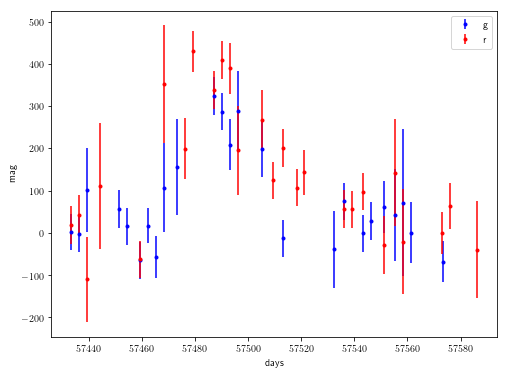

In [30]:
plotlc(lc, time_key='mjd', mag_key='flux', filter_key='passband', err_key = 'fluxerr')

In [31]:
classification = Classify()
predictions, time_steps = classification.get_predictions(light_curve_list)
print(predictions)


/Users/home/Documents/Research/maf/astrorapid/keras_model_with_redshift.hdf5
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Preparing light curve 0 of 1
[array([[5.02358556e-01, 4.60077338e-02, 2.97409594e-02, 6.08790964e-02,
        3.56927589e-02, 4.07424644e-02, 1.40882274e-02, 1.27342879e-03,
        3.48496251e-02, 2.03168429e-02, 1.63325248e-03, 1.89056657e-02,
        3.90245430e-02, 1.54486805e-01],
       [5.97850204e-01, 3.75401452e-02, 3.35377082e-02, 8.33423883e-02,
        5.89572378e-02, 4.86203022e-02, 2.92290542e-02, 5.82220033e-04,
        4.02331119e-03, 1.85198453e-03, 1.24369690e-03, 4.16163392e-02,
        2.18037944e-02, 3.98016907e-02],
       [5.90213537e-01, 1.97185501e-02, 3.85993347e-02, 9.10262167e-02,
        8.47767591e-02, 5.50097525e-02, 3.40785012e-02, 3.67762375e-04,


In [32]:
# Plot light curve and classification vs time of the light curves at the specified indexes
classification.plot_light_curves_and_classifications()


/Users/home/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/home/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


([            g                                           r              \
           time        flux     fluxErr photflag       time        flux   
  0  -37.189365    2.035723   42.784702      0.0 -37.172909   17.573107   
  1  -34.757454   -2.038270   43.836651      0.0 -34.774155   41.445435   
  2  -32.325298  100.845879   99.987038      0.0 -32.343945 -110.726639   
  3  -22.614601   55.482742   45.262482      0.0 -28.309271  111.328964   
  4  -20.199390   14.867026   43.040398      0.0 -16.162933  -63.483360   
  5  -16.181255  -65.136810   44.006790      0.0  -8.951836  352.449066   
  6  -13.731672   16.740545   41.856007      0.0  -2.433451  199.590576   
  7  -11.283062  -57.269131   49.354336      0.0   0.000000  429.830750   
  8   -8.901089  106.491837  105.864388      0.0   6.486770  338.525513   
  9   -4.860902  155.052353  114.004402      0.0   8.916816  409.946045   
  10   6.468773  324.459839   45.697918   4096.0  11.331782  389.712616   
  11   8.898900  287.3544

No handles with labels found to put in legend.
No handles with labels found to put in legend.


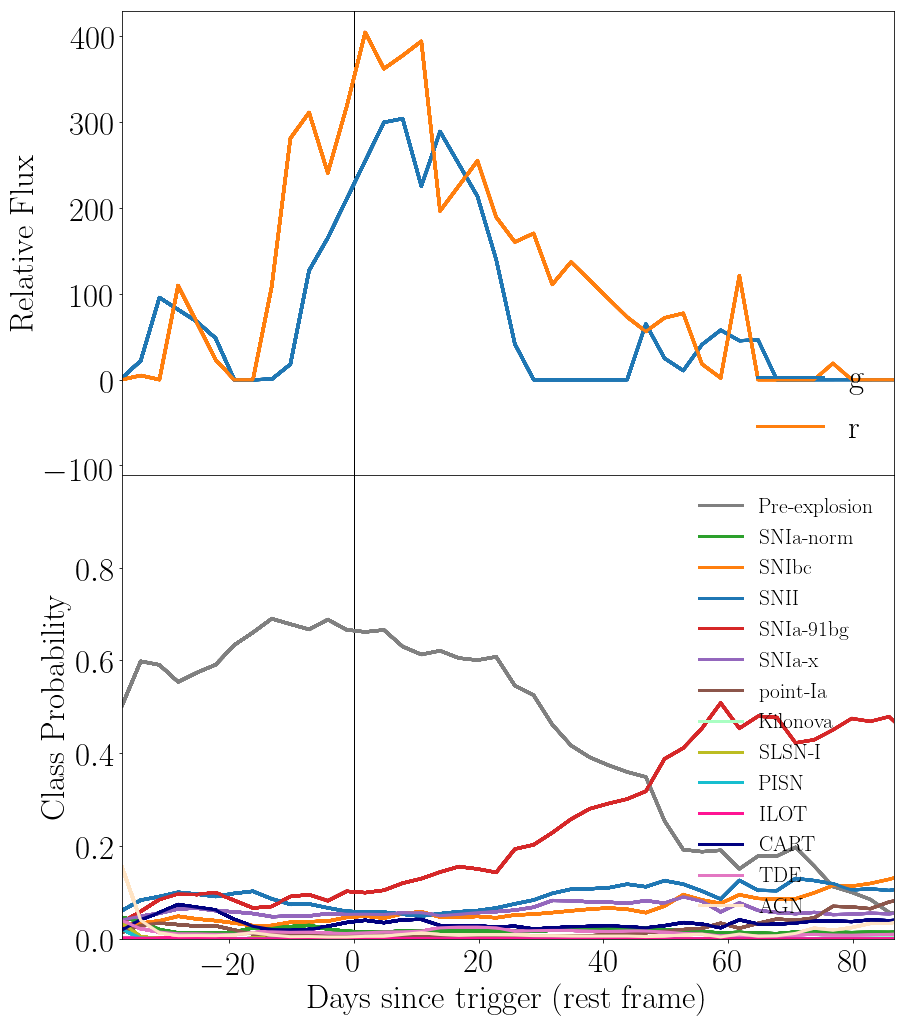

In [33]:
classification.plot_classification_animation()
